In [1]:
import pandas as pd #veri analizi ve veri manipülasyonu
import numpy as np #sayısal hesaplamalar ve matrisler
import matplotlib.pyplot as plt #veri görselleştirme
import seaborn as sns #istatistiksel grafikler
from sklearn.preprocessing import StandardScaler #veri standartlaştırma
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

In [2]:
df = pd.read_csv('ddos.csv')
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
num_rows = len(df.index) #satır
num_cols = len(df.columns) #sütun

print("Satır sayısı:", num_rows)
print("Sütun sayısı:", num_cols)

Satır sayısı: 225745
Sütun sayısı: 79


In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
# Çıkarılacak sütunların listesi
columns_to_drop = [
    ' Fwd Header Length.1', 'Flow Bytes/s', ' Flow Packets/s',
    'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
    ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags'
]

# Sütunları çıkarma
df = df.drop(columns=columns_to_drop)
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.columns = df.columns.str.strip() #sütun adındaki gereksiz boşlukları kaldırır
df.loc[:,'Label'].unique() #tekrarlanan değerleri kaldırıp sadece unique olanları listeler

array(['BENIGN', 'DDoS'], dtype=object)

In [7]:
df.info()
# (data_f.dtypes=='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float64
 13 

In [8]:
data_f=df.dropna() #eksik verileri çıkarma
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

BENIGN sayısı: 97718
DDoS sayısı: 128027


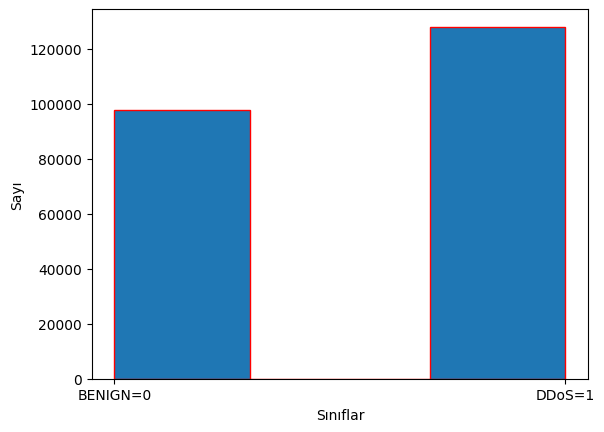

In [9]:
class_counts = data_f['Label'].value_counts()
print("BENIGN sayısı:", class_counts[0])
print("DDoS sayısı:", class_counts[1])

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='red') #histogramdaki aralıklar
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Sınıflar")
plt.ylabel("Sayı")
plt.show()


In [10]:
# Verilerin hazırlanması
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Inf ve -Inf değerlerini NaN olarak ayarlanması
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN değerlerini içeren satırları veri setinden çıkarılması
X.dropna(inplace=True)

# Satırların unique olup olmadığının kontrolü
is_unique = X.duplicated().sum() == 0

if is_unique:
    print("Veri setinde tekrarlanan satır yok.")
else:
    duplicated_count = X.duplicated().sum()
    print(f"Veri setinde {duplicated_count} tekrarlanan satır var.")
    # Tekrarlanan satırları kaldır
    X.drop_duplicates(inplace=True)
    print("Tekrarlanan satırlar kaldırıldı.")
# Kalan satır sayısını yazdır
remaining_rows = len(X)
print(f"Kalan satır sayısı: {remaining_rows}")

# Hedef değişkenin (Label) de aynı satırlarla tutarlı olmasını sağla
y = y[X.index]

Veri setinde 2633 tekrarlanan satır var.
Tekrarlanan satırlar kaldırıldı.
Kalan satır sayısı: 223112


In [11]:
# Veriyi standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# # Hiperparametre ızgarası
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
#     'kernel': ['rbf']
# }

# # GridSearchCV kullanarak en iyi parametreleri bulun
# grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy')
# grid.fit(X, y)

# print(f'En İyi Parametreler: {grid.best_params_}')

# # En iyi modeli değerlendirin
# best_svm_model = grid.best_estimator_

# Modelleri oluştur
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, reg_alpha=0.1, reg_lambda=1)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
knn_model = KNeighborsClassifier(n_neighbors=10)
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Değerlendirme metriklerini oluştur
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}


In [13]:
# StratifiedKFold kullanarak cross-validation yap
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
# MLP 
results_mlp = cross_validate(mlp_model, X, y, cv=cv, scoring=scoring)
print('\nMLP Cross-Validation Değerlendirme Metrikleri:')
print(f"Accuracy: {np.mean(results_mlp['test_accuracy'])}")
print(f"F1 Score: {np.mean(results_mlp['test_f1'])}")
print(f"Precision: {np.mean(results_mlp['test_precision'])}")
print(f"Recall: {np.mean(results_mlp['test_recall'])}")


MLP Cross-Validation Değerlendirme Metrikleri:
Accuracy: 0.9509435948981381
F1 Score: 0.947963092836628
Precision: 0.9625211736157079
Recall: 0.9427581460756456


In [15]:
# XGBoost
results_xgb = cross_validate(xgb_model, X, y, cv=cv, scoring=scoring)
print('\nXGBoost Cross-Validation Değerlendirme Metrikleri:')
print(f"Accuracy: {np.mean(results_xgb['test_accuracy'])}")
print(f"F1 Score: {np.mean(results_xgb['test_f1'])}")
print(f"Precision: {np.mean(results_xgb['test_precision'])}")
print(f"Recall: {np.mean(results_xgb['test_recall'])}") #10 saniye



XGBoost Cross-Validation Değerlendirme Metrikleri:
Accuracy: 0.9998072720658389
F1 Score: 0.9998029937002746
Precision: 0.999786154384158
Recall: 0.9998198846793678


In [16]:
# Decision Tree
results_dt = cross_validate(dt_model, X, y, cv=5, scoring=scoring)
print('\nDecision Tree Cross-Validation Değerlendirme Metrikleri:')
print(f"Accuracy: {np.mean(results_dt['test_accuracy'])}")
print(f"F1 Score: {np.mean(results_dt['test_f1'])}")
print(f"Precision: {np.mean(results_dt['test_precision'])}")
print(f"Recall: {np.mean(results_dt['test_recall'])}") #20 saniye


Decision Tree Cross-Validation Değerlendirme Metrikleri:
Accuracy: 0.9910179737535352
F1 Score: 0.990759989690529
Precision: 0.9922438333917437
Recall: 0.9896364809123745


In [17]:
# KNN
results_knn = cross_validate(knn_model, X, y, cv=cv, scoring=scoring)
print('\nKNN Cross-Validation Değerlendirme Metrikleri:')
print(f"Accuracy: {np.mean(results_knn['test_accuracy'])}")
print(f"F1 Score: {np.mean(results_knn['test_f1'])}")
print(f"Precision: {np.mean(results_knn['test_precision'])}")
print(f"Recall: {np.mean(results_knn['test_recall'])}") # 160 saniye


KNN Cross-Validation Değerlendirme Metrikleri:
Accuracy: 0.9977096695349547
F1 Score: 0.9976580369982649
Precision: 0.9977992438816619
Recall: 0.9975187561334433


In [ ]:
# SVM
results_svm = cross_validate(svm_model, X, y, cv=cv, scoring=scoring)
print('\nSVM Cross-Validation Değerlendirme Metrikleri:')
print(f"Accuracy: {np.mean(results_svm['test_accuracy'])}")
print(f"F1 Score: {np.mean(results_svm['test_f1'])}")
print(f"Precision: {np.mean(results_svm['test_precision'])}")
print(f"Recall: {np.mean(results_svm['test_recall'])}") #38953 saniye

In [ ]:
# from sklearn.model_selection import cross_val_predict

# xgb_proba = cross_val_predict(xgb_model, X, y, cv=cv, method='predict_proba')
# svm_proba = cross_val_predict(svm_model, X, y, cv=cv, method='predict_proba')
# knn_proba = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')
# dt_proba =  cross_val_predict(dt_model, X, y, cv=cv, method='predict_proba')

# # ROC eğrisi hesaplamaları
# xgb_fpr, xgb_tpr, _ = roc_curve(y, xgb_proba[:, 1])
# xgb_auc = auc(xgb_fpr, xgb_tpr)

# svm_fpr, svm_tpr, _ = roc_curve(y, svm_proba[:, 1])
# svm_auc = auc(svm_fpr, svm_tpr)

# knn_fpr, knn_tpr, _ = roc_curve(y, knn_proba[:, 1])
# knn_auc = auc(knn_fpr, knn_tpr)

# dt_fpr, dt_tpr, _ = roc_curve(y, dt_proba[:, 1])
# dt_auc = auc(dt_fpr, dt_tpr)

# # ROC eğrisi çizimi
# plt.figure()
# plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
# plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
# plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
# plt.plot(dt_fpr, dt_tpr, label=f'DT (AUC = {dt_auc:.2f})')

# # Rastgele sınıflandırma için ROC eğrisi
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Rastgele Sınıflandırma (AUC = 0.50)')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Eğrisi')
# plt.legend()
# plt.grid()
# plt.show() #36819 saniye

xgb_proba = cross_val_predict(xgb_model, X, y, cv=cv, method='predict_proba')
svm_proba = cross_val_predict(svm_model, X, y, cv=cv, method='predict_proba')
knn_proba = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')
dt_proba =  cross_val_predict(dt_model, X, y, cv=cv, method='predict_proba')
mlp_proba = cross_val_predict(mlp_model, X, y, cv=cv, method='predict_proba')

# ROC eğrisi hesaplamaları
xgb_fpr, xgb_tpr, _ = roc_curve(y, xgb_proba[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y, svm_proba[:, 1])
svm_auc = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y, knn_proba[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y, dt_proba[:, 1])
dt_auc = auc(dt_fpr, dt_tpr)

mlp_fpr, mlp_tpr, _ = roc_curve(y, mlp_proba[:, 1])
mlp_auc = auc(mlp_fpr, mlp_tpr)

# ROC eğrisi çizimi
plt.figure()
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'DT (AUC = {dt_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP (AUC = {mlp_auc:.2f})')



# Rastgele sınıflandırma için ROC eğrisi
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Rastgele Sınıflandırma (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend()
plt.grid()
plt.show()

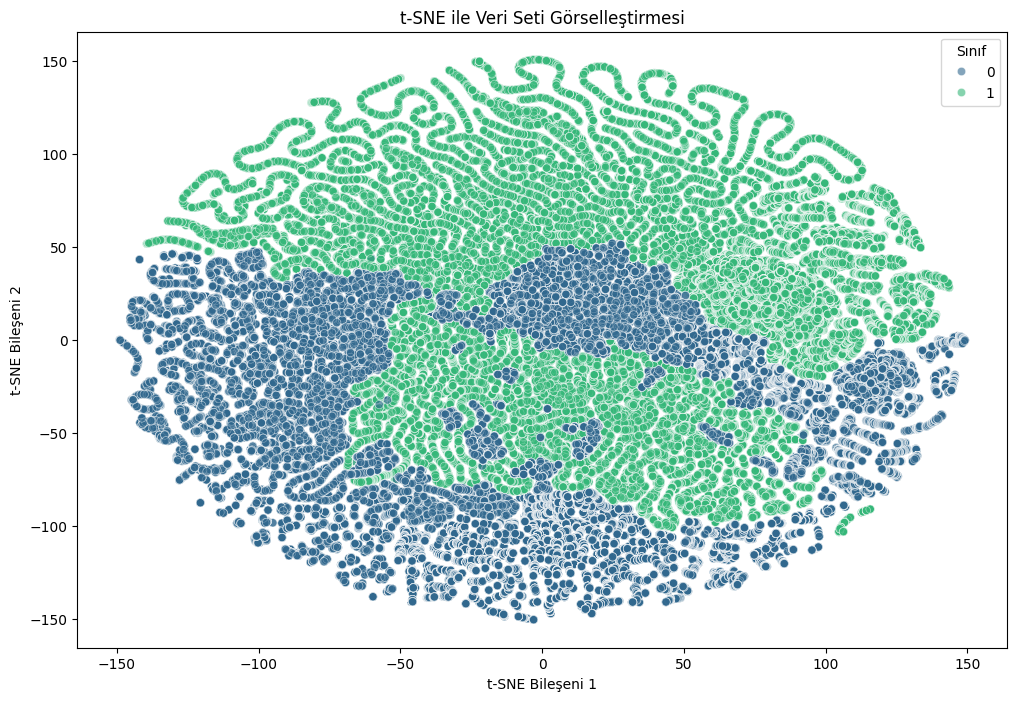

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns
# t-SNE ile boyut indirgeme ve görselleştirme
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', alpha=0.6)
plt.title('t-SNE ile Veri Seti Görselleştirmesi')
plt.xlabel('t-SNE Bileşeni 1')
plt.ylabel('t-SNE Bileşeni 2')
plt.legend(title='Sınıf')
plt.show()